## Practicing Intro to Statistics

### Practicing on August 29th, 2025

### Loading Packages

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Zara Dataset

In [20]:
fashion_trend = pd.read_csv("/Users/auroraxiao/Desktop/Data Science Project/DS-Projects/Data Set/fashion_data_2018_2022.csv")


In [21]:
fashion_trend.head()

,product_id,product_name,gender,category,pattern,color,age_group,season,price,material,sales_count,reviews_count,average_rating,out_of_stock_times,brand,discount,last_stock_date,wish_list_count,month_of_sale,year_of_sale
0,1001,Biker Jacket,Male,Shirt,Geometric,White,25-35,Spring,70.36,Synthetic,75,65,4.9,3,ZARA,20%,1/28/18,211,1,2018
1,1002,Business Shirt,Male,Jacket,Polka Dots,Beige,18-24,Summer,91.59,Wool,296,25,3.5,6,ZARA,0%,1/28/18,211,1,2018
2,1003,Wool Jacket,Female,Dress,Geometric,Brown,18-24,All,129.52,Wool,50,32,4.3,4,ZARA,5%,1/7/18,64,1,2018
3,1004,Summer Dress,Male,Shorts,Plain,White,25-35,All,116.01,Cotton,435,73,4.6,3,ZARA,10%,1/1/18,171,1,2018
4,1005,Casual Jeans,Male,Shirt,Plain,Beige,35-45,Winter,125.48,Viscose,79,36,3.6,4,ZARA,0%,1/28/18,126,1,2018


In [22]:
print(fashion_trend.info())
print(fashion_trend.describe())
print(fashion_trend.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          660 non-null    int64  
 1   product_name        660 non-null    object 
 2   gender              660 non-null    object 
 3   category            660 non-null    object 
 4   pattern             660 non-null    object 
 5   color               660 non-null    object 
 6   age_group           660 non-null    object 
 7   season              660 non-null    object 
 8   price               660 non-null    float64
 9   material            660 non-null    object 
 10  sales_count         660 non-null    int64  
 11  reviews_count       660 non-null    int64  
 12  average_rating      660 non-null    float64
 13  out_of_stock_times  660 non-null    int64  
 14  brand               660 non-null    object 
 15  discount            660 non-null    object 
 16  last_sto

In [23]:
fashion_trend["brand"].value_counts()

brand
ZARA    660
Name: count, dtype: int64

In [24]:
fashion_trend["category"].value_counts()

category
Skirt     99
Dress     86
Blouse    82
Shorts    82
Shoes     82
Shirt     78
Jeans     78
Jacket    73
Name: count, dtype: int64

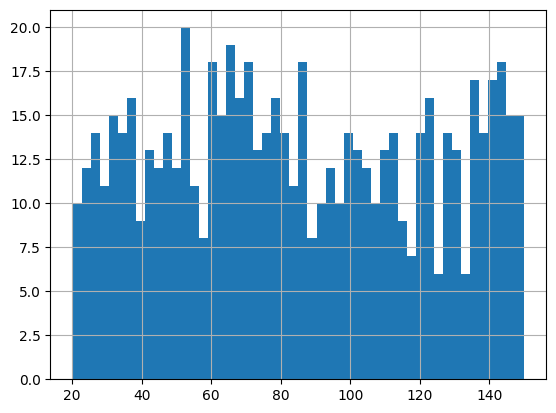

In [25]:
fashion_trend["price"].hist(bins=50)
plt.show()

In [26]:
### what is the average price of items in each category?
fashion_trend.groupby("category")["price"].agg('mean')

category
Blouse    86.708415
Dress     87.220581
Jacket    87.479589
Jeans     82.000513
Shirt     86.945641
Shoes     81.693415
Shorts    88.018659
Skirt     80.682626
Name: price, dtype: float64

<Figure size 1000x600 with 0 Axes>

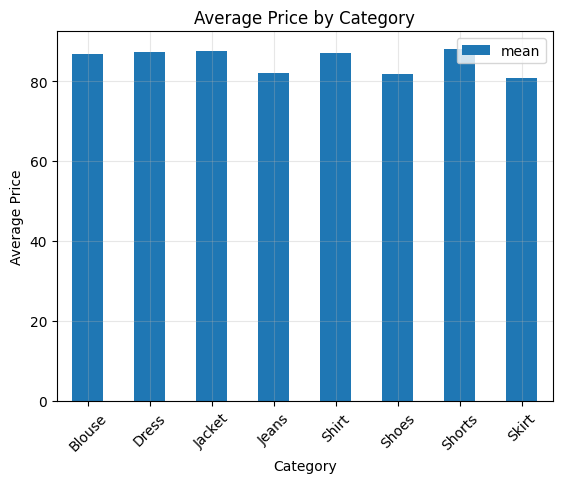

In [27]:
## if i would like to refine my code from above and add a graph 

avg_price_by_category = fashion_trend.groupby("category")["price"].agg(['mean']).round(2)


plt.figure(figsize=(10, 6))
avg_price_by_category.plot(kind='bar')
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

In [28]:
fashion_trend["category"].value_counts(sort = True)

category
Skirt     99
Dress     86
Blouse    82
Shorts    82
Shoes     82
Shirt     78
Jeans     78
Jacket    73
Name: count, dtype: int64

In [29]:
### check the duplication of product_id
fashion_trend['product_id'].duplicated().any()
## thereffre, there are no duplicated product_id in the dataset     

np.False_

### Practicing Varaince, Standard Deviation, and Mean Absolute Deviation based on fashion_trends price to the avg price of all products


In [30]:
### Variance
np.var(fashion_trend["price"])

np.float64(1413.337395147842)

In [31]:
### Variance step by step

### calculate the mean of the price column

mean_price = np.mean(fashion_trend["price"])
diff_from_mean = fashion_trend["price"] - mean_price
squared_diff = diff_from_mean ** 2
variance_price = np.mean(squared_diff)
variance_price

np.float64(1413.337395147842)

In [32]:
### Standard Deviation
np.std(fashion_trend["price"])

np.float64(37.594379834595514)

In [33]:
### Standard Deviation Step by Step from Variance
np.sqrt(variance_price)

np.float64(37.594379834595514)

In [34]:
### Mean Absolute Deviation
np.mean(np.abs(diff_from_mean))

np.float64(32.491239669421496)

### practicing quantile

In [35]:
np.quantile(fashion_trend["price"], [0, 0.25, 0.5, 0.75, 1])

array([ 20.25  ,  53.1975,  82.04  , 117.77  , 149.93  ])

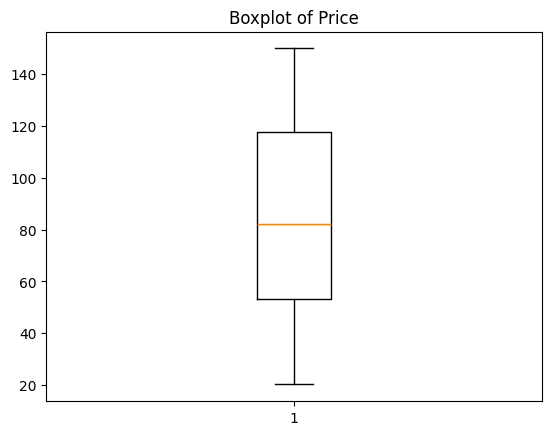

In [36]:
plt.boxplot(fashion_trend["price"])
plt.title("Boxplot of Price")
plt.show()

In [37]:
from scipy.stats import iqr
iqr_value = iqr(fashion_trend["price"])

In [38]:
iqr_value

np.float64(64.57249999999999)

### Practicing Sampling

Sampling

You have a dataset of 1000 customer IDs in a pandas DataFrame.

(a) Use .sample() to select 10 random customers.

(b) How would you make sure the sampling is reproducible?

(c) How would you select 20% of the dataset randomly?

In [41]:
## first generate a customer dataset

# Set random seed for reproducibility
np.random.seed(42)

# Number of rows
n = 1000

# Generate synthetic customer dataset
df = pd.DataFrame({
    "CustomerID": range(1, n+1),
    "Name": [f"Customer_{i}" for i in range(1, n+1)],
    "Age": np.random.randint(18, 70, size=n),
    "Country": np.random.choice(["USA", "Canada", "UK", "Germany", "France"], size=n),
    "SignupDate": pd.to_datetime(
        np.random.choice(pd.date_range("2020-01-01", "2023-12-31"), size=n)
    ),
    "Spending": np.random.randint(100, 5000, size=n)  # in USD
})

print(df.head())
print(df.shape)

   CustomerID        Name  Age  Country SignupDate  Spending
0           1  Customer_1   56       UK 2023-05-24      2010
1           2  Customer_2   69       UK 2023-06-28      3704
2           3  Customer_3   46      USA 2020-05-05       769
3           4  Customer_4   32   France 2020-08-04      4464
4           5  Customer_5   60  Germany 2023-08-22      1383
(1000, 6)


In [42]:
### use .sample() to take a random sample of 10 customer
df.sample(n= 10)

,CustomerID,Name,Age,Country,SignupDate,Spending
565,566,Customer_566,29,France,2020-12-25,1328
237,238,Customer_238,19,USA,2023-04-05,3439
981,982,Customer_982,45,USA,2020-08-07,3651
887,888,Customer_888,47,France,2021-02-26,2735
22,23,Customer_23,55,Canada,2022-10-28,745
544,545,Customer_545,22,France,2023-06-05,1150
922,923,Customer_923,33,Germany,2021-01-10,4173
349,350,Customer_350,39,UK,2021-07-14,3515
430,431,Customer_431,53,USA,2021-02-03,1076
404,405,Customer_405,67,France,2020-02-12,2251


### How to make sure the results/sample is reproduciable?

In [44]:
np.random.seed(43)
df.sample(n= 10)

,CustomerID,Name,Age,Country,SignupDate,Spending
858,859,Customer_859,56,Germany,2023-08-29,3530
986,987,Customer_987,62,USA,2022-07-16,4007
183,184,Customer_184,45,Canada,2023-07-24,4105
502,503,Customer_503,22,Germany,2020-05-08,3058
710,711,Customer_711,56,UK,2023-03-23,3130
692,693,Customer_693,55,Germany,2022-11-03,4163
604,605,Customer_605,54,UK,2021-02-17,622
653,654,Customer_654,29,France,2020-01-23,2200
447,448,Customer_448,39,Germany,2021-04-27,2908
884,885,Customer_885,67,USA,2020-01-28,4846


In [45]:
df.sample(n= 10, random_state = 43)

,CustomerID,Name,Age,Country,SignupDate,Spending
858,859,Customer_859,56,Germany,2023-08-29,3530
986,987,Customer_987,62,USA,2022-07-16,4007
183,184,Customer_184,45,Canada,2023-07-24,4105
502,503,Customer_503,22,Germany,2020-05-08,3058
710,711,Customer_711,56,UK,2023-03-23,3130
692,693,Customer_693,55,Germany,2022-11-03,4163
604,605,Customer_605,54,UK,2021-02-17,622
653,654,Customer_654,29,France,2020-01-23,2200
447,448,Customer_448,39,Germany,2021-04-27,2908
884,885,Customer_885,67,USA,2020-01-28,4846


In [46]:
### How to select 20% of the data as a sample?
df.sample(frac = 0.2,  random_state = 40)

,CustomerID,Name,Age,Country,SignupDate,Spending
204,205,Customer_205,54,USA,2023-05-10,1259
71,72,Customer_72,59,Canada,2020-01-19,1048
594,595,Customer_595,21,UK,2022-02-21,2048
672,673,Customer_673,35,France,2021-04-17,839
14,15,Customer_15,57,USA,2023-08-10,3964
...,...,...,...,...,...,...
647,648,Customer_648,69,UK,2021-02-24,334
797,798,Customer_798,64,UK,2023-10-04,719
605,606,Customer_606,26,UK,2023-04-10,3623
611,612,Customer_612,53,Canada,2020-05-01,2957


### Binominal Distribution

Assume a fair coin (𝑝=0.5 is tossed 𝑛=10 times.)

Use the PMF to calculate the probability of getting exactly 6 heads.

Use the CDF to calculate the probability of getting at most 6 heads.

Use rvs to simulate 15 experiments of tossing the coin 10 times.

What value does ppf(0.95) give, and what does it mean in this context?

In [47]:
from scipy.stats import binom
binom.pmf(k = 6,n = 10, p= 0.5)

np.float64(0.2050781249999999)

In [48]:
binom.cdf(k = 6, n = 10, p = 0.5)

np.float64(0.828125)

In [49]:
simulation_coin_toss = binom.rvs(n = 10, p = 0.5, size = 15)

In [52]:
binom.ppf(0.95, n = 10, p= 0.5)

np.float64(8.0)

### ppf is the inverse of cdf, based on binom.ppf(0.95, n = 10, p = 0.5)
it means that in 10 coin tosses, the maximum number of heads we can get with 95% confidence is 8.

In [50]:
print(simulation_coin_toss)

[ 4  9  6  7  5  6  4  4  7  6  6 10  7  5  5]


### Uniform Distribution

Suppose 𝑋~Uniform(0,10)

What is the probability P(3≤X≤7)? (hint: use the CDF).

Generate 5 random samples using rvs.

What number does ppf(0.25) return? Why does it make sense?

In [53]:
from scipy.stats import uniform
print(uniform.cdf(7, loc = 0, scale = 10) - uniform.cdf(3, loc = 0, scale = 10))

0.39999999999999997


In [54]:
uniform.rvs(loc = 0, scale = 10, size = 5)

array([6.50915075, 7.37632582, 6.16525599, 2.07423627, 3.71216086])

In [56]:
uniform.ppf(0.25, loc = 0, scale = 10)

## uniform.ppf(0.25, loc = 0, scale = 10) stands for the 25th percentile of a uniform distribution that ranges from 0 to 10.

np.float64(2.5)

### Normal Distribution

Let X∼N(μ=50,σ=10).

What is the probability P(X≤60)?

What is the z-score for 60?

Generate 10 samples using rvs.

Use ppf to find the 2.5th and 97.5th percentiles — what interval is this?

In [57]:
from scipy.stats import norm
norm.cdf(60, loc = 50, scale = 10)

np.float64(0.8413447460685429)

In [60]:
norm.ppf(60, loc = 50, scale = 10)

np.float64(nan)

In [62]:
z_score = (60-50)/10
z_score


1.0

In [63]:
norm.rvs(loc = 50, scale = 10, size = 10)

array([56.08504268, 54.26339092, 43.46318284, 55.47021902, 53.63215816,
       48.50820425, 56.05037244, 47.34732589, 55.80728806, 25.05137155])

In [64]:
upper_bound = norm.ppf(0.975, loc = 50, scale = 10)
lower_bound = norm.ppf(0.025, loc = 50, scale = 10)
(upper_bound, lower_bound)

(np.float64(69.59963984540053), np.float64(30.400360154599454))

### Exponential Distribution

Suppose customer arrivals follow an exponential distribution with mean 5 minutes.
(Recall: if mean = 𝜇, then λ=1/μ).

What is the probability that the next customer arrives within 3 minutes?

Simulate 8 waiting times with rvs.

Use ppf(0.9) to find the 90th percentile waiting time.

in python, the scale for exponential distribution is equal to 1/lambda
lambda = 1/mean
therefore, scale = mean

In [67]:
from scipy.stats import expon
expon.cdf(3, scale = 5)


np.float64(0.4511883639059735)

In [68]:
expon.rvs(scale = 5, size = 8)

array([3.85699452, 0.23162547, 2.14046283, 2.15252486, 1.85732624,
       1.7045963 , 3.20974992, 0.75403619])

In [69]:
expon.ppf(0.9, scale = 5)

np.float64(11.51292546497023)

### Poisson Distribution

A call center gets on average 4 calls per hour.

Use the PMF to find the probability of receiving exactly 2 calls in the next hour.

Use the CDF to find the probability of receiving at most 2 calls.

Simulate 12 hours of calls using rvs.

What does ppf(0.95) tell you in this context?

In [72]:
from scipy.stats import poisson
poisson.pmf(2, 4)

np.float64(0.14652511110987343)

In [74]:
poisson.cdf(2, 4)

np.float64(0.23810330555354436)

In [75]:
poisson.rvs(4, size = 12)

array([7, 5, 6, 5, 7, 7, 0, 0, 5, 4, 3, 2])

In [77]:
poisson.ppf(0.95, 4)
## what does poisson.ppf(0.95, 4) mean? i
## it means the value below which 95% of the observations fall in a Poisson distribution with a mean of 4.


np.float64(8.0)

### Correlation

In [78]:
df.head()

,CustomerID,Name,Age,Country,SignupDate,Spending
0,1,Customer_1,56,UK,2023-05-24,2010
1,2,Customer_2,69,UK,2023-06-28,3704
2,3,Customer_3,46,USA,2020-05-05,769
3,4,Customer_4,32,France,2020-08-04,4464
4,5,Customer_5,60,Germany,2023-08-22,1383


In [81]:
df['Age'].corr(df['Spending'])

np.float64(0.015314764377192033)